# <span style="color:green">**TOMATO LEAF DISEASE CLASSIFICATION**</span>

This notebook focuses on building a robust Tomato Leaf Disease Classification model using deep learning techniques. Taking advantage of **transfer learning**, the project utilizes the **MobileNet** architecture, known for its lightweight, efficiency and high performance on image classification tasks. By analyzing images of tomato leaves, the model aims to accurately identify various diseases.

***Importing required libraries***

In [1]:
import json
import os
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from warnings import filterwarnings

In [2]:
filterwarnings('ignore')

***Defining some configuration parameters***

In [3]:
NUM_CLASSES = 11
IMG_SIZE = [224,224,3]
BATCH_SIZE = 32
SEED = 7
LEARNING_RATE = 1e-4
EPOCHS = 100

***Loading the training, validation and testing images from the file system***

In [4]:
train_ds, val_ds = image_dataset_from_directory('dataset\\train\\',subset='both',seed=SEED,batch_size=BATCH_SIZE,image_size=IMG_SIZE[:-1],validation_split=0.2)
test_ds = image_dataset_from_directory('dataset\\valid\\',image_size=IMG_SIZE[:-1])

Found 23861 files belonging to 11 classes.
Using 19089 files for training.
Using 4772 files for validation.
Found 6678 files belonging to 11 classes.


***Getting the MobileNet model and freezing its layers***

In [5]:
base = MobileNetV3Small(
    include_top=False,
    input_shape=IMG_SIZE,
    include_preprocessing=True
)
base.trainable = False

***Building the Model with the Top Classification Layer and Compiling It***

In [6]:
inp = keras.Input(shape=(None,None,None))
x = layers.Resizing(IMG_SIZE[0], IMG_SIZE[1])(inp)
x = base(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(.25)(x)
x = layers.Dense(128,activation='relu')(x)
x = layers.Dense(256,activation='relu')(x)
out = layers.Dense(NUM_CLASSES,activation='softmax')(x)


model = keras.Model(inp,out)
model.compile(
                loss='sparse_categorical_crossentropy',
                optimizer=Adam(learning_rate=LEARNING_RATE),
                metrics=['accuracy']
                )

***Displaying a summary of the Model Architecture***

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, None  0         
                             )]                                  
                                                                 
 resizing (Resizing)         (None, 224, 224, None)    0         
                                                                 
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 576)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 576)               0         
                                                             

***Defining callbacks for model training***

In [8]:
callbacks = [
    ModelCheckpoint(save_best_only=True,filepath='model/',monitor='val_loss'),
    EarlyStopping(patience=5,monitor='val_loss')
]

***Training the model***

In [9]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    callbacks=callbacks
)

Epoch 1/100
597/597 [==============================] - ETA: 0s - loss: 1.5006 - accuracy: 0.5149

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 56s 84ms/step - loss: 1.5006 - accuracy: 0.5149 - val_loss: 0.8275 - val_accuracy: 0.7529
Epoch 2/100
596/597 [============================>.] - ETA: 0s - loss: 0.8270 - accuracy: 0.7350

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 57s 94ms/step - loss: 0.8269 - accuracy: 0.7349 - val_loss: 0.6069 - val_accuracy: 0.8137
Epoch 3/100
596/597 [============================>.] - ETA: 0s - loss: 0.6733 - accuracy: 0.7820

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 57s 95ms/step - loss: 0.6735 - accuracy: 0.7819 - val_loss: 0.5184 - val_accuracy: 0.8372
Epoch 4/100
596/597 [============================>.] - ETA: 0s - loss: 0.5981 - accuracy: 0.8039

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 57s 95ms/step - loss: 0.5979 - accuracy: 0.8040 - val_loss: 0.4611 - val_accuracy: 0.8508
Epoch 5/100
597/597 [==============================] - ETA: 0s - loss: 0.5477 - accuracy: 0.8192

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 58s 96ms/step - loss: 0.5477 - accuracy: 0.8192 - val_loss: 0.4253 - val_accuracy: 0.8613
Epoch 6/100
597/597 [==============================] - ETA: 0s - loss: 0.5034 - accuracy: 0.8301

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 57s 96ms/step - loss: 0.5034 - accuracy: 0.8301 - val_loss: 0.3963 - val_accuracy: 0.8692
Epoch 7/100
597/597 [==============================] - ETA: 0s - loss: 0.4793 - accuracy: 0.8404

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 54s 90ms/step - loss: 0.4793 - accuracy: 0.8404 - val_loss: 0.3782 - val_accuracy: 0.8707
Epoch 8/100
597/597 [==============================] - ETA: 0s - loss: 0.4492 - accuracy: 0.8484

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 55s 92ms/step - loss: 0.4492 - accuracy: 0.8484 - val_loss: 0.3558 - val_accuracy: 0.8806
Epoch 9/100
597/597 [==============================] - ETA: 0s - loss: 0.4370 - accuracy: 0.8520

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 57s 94ms/step - loss: 0.4370 - accuracy: 0.8520 - val_loss: 0.3442 - val_accuracy: 0.8858
Epoch 10/100
597/597 [==============================] - ETA: 0s - loss: 0.4169 - accuracy: 0.8595

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 60s 100ms/step - loss: 0.4169 - accuracy: 0.8595 - val_loss: 0.3238 - val_accuracy: 0.8929
Epoch 11/100
597/597 [==============================] - ETA: 0s - loss: 0.4050 - accuracy: 0.8623

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 50s 83ms/step - loss: 0.4050 - accuracy: 0.8623 - val_loss: 0.3105 - val_accuracy: 0.8944
Epoch 12/100
597/597 [==============================] - ETA: 0s - loss: 0.3850 - accuracy: 0.8701

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 50s 84ms/step - loss: 0.3850 - accuracy: 0.8701 - val_loss: 0.3087 - val_accuracy: 0.8948
Epoch 13/100
597/597 [==============================] - ETA: 0s - loss: 0.3686 - accuracy: 0.8743

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 55s 92ms/step - loss: 0.3686 - accuracy: 0.8743 - val_loss: 0.2864 - val_accuracy: 0.9078
Epoch 14/100
597/597 [==============================] - 33s 55ms/step - loss: 0.3600 - accuracy: 0.8774 - val_loss: 0.2939 - val_accuracy: 0.9015
Epoch 15/100
597/597 [==============================] - ETA: 0s - loss: 0.3449 - accuracy: 0.8834

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 56s 93ms/step - loss: 0.3449 - accuracy: 0.8834 - val_loss: 0.2748 - val_accuracy: 0.9072
Epoch 16/100
597/597 [==============================] - ETA: 0s - loss: 0.3389 - accuracy: 0.8838

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 51s 85ms/step - loss: 0.3389 - accuracy: 0.8838 - val_loss: 0.2746 - val_accuracy: 0.9097
Epoch 17/100
597/597 [==============================] - ETA: 0s - loss: 0.3307 - accuracy: 0.8872

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 51s 84ms/step - loss: 0.3307 - accuracy: 0.8872 - val_loss: 0.2652 - val_accuracy: 0.9080
Epoch 18/100
596/597 [============================>.] - ETA: 0s - loss: 0.3207 - accuracy: 0.8896

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 51s 84ms/step - loss: 0.3209 - accuracy: 0.8896 - val_loss: 0.2551 - val_accuracy: 0.9141
Epoch 19/100
597/597 [==============================] - ETA: 0s - loss: 0.3089 - accuracy: 0.8944

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 51s 85ms/step - loss: 0.3089 - accuracy: 0.8944 - val_loss: 0.2510 - val_accuracy: 0.9143
Epoch 20/100
597/597 [==============================] - 34s 57ms/step - loss: 0.3051 - accuracy: 0.8948 - val_loss: 0.2557 - val_accuracy: 0.9170
Epoch 21/100
597/597 [==============================] - ETA: 0s - loss: 0.2968 - accuracy: 0.8974

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 58s 97ms/step - loss: 0.2968 - accuracy: 0.8974 - val_loss: 0.2402 - val_accuracy: 0.9223
Epoch 22/100
597/597 [==============================] - ETA: 0s - loss: 0.2901 - accuracy: 0.9021

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 56s 93ms/step - loss: 0.2901 - accuracy: 0.9021 - val_loss: 0.2358 - val_accuracy: 0.9197
Epoch 23/100
597/597 [==============================] - 32s 53ms/step - loss: 0.2801 - accuracy: 0.9058 - val_loss: 0.2517 - val_accuracy: 0.9168
Epoch 24/100
596/597 [============================>.] - ETA: 0s - loss: 0.2763 - accuracy: 0.9077

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 54s 91ms/step - loss: 0.2763 - accuracy: 0.9076 - val_loss: 0.2311 - val_accuracy: 0.9248
Epoch 25/100
596/597 [============================>.] - ETA: 0s - loss: 0.2705 - accuracy: 0.9079

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 59s 99ms/step - loss: 0.2705 - accuracy: 0.9079 - val_loss: 0.2122 - val_accuracy: 0.9323
Epoch 26/100
597/597 [==============================] - 36s 59ms/step - loss: 0.2649 - accuracy: 0.9087 - val_loss: 0.2161 - val_accuracy: 0.9302
Epoch 27/100
597/597 [==============================] - 34s 57ms/step - loss: 0.2586 - accuracy: 0.9121 - val_loss: 0.2189 - val_accuracy: 0.9269
Epoch 28/100
596/597 [============================>.] - ETA: 0s - loss: 0.2535 - accuracy: 0.9128

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 58s 98ms/step - loss: 0.2534 - accuracy: 0.9128 - val_loss: 0.2104 - val_accuracy: 0.9313
Epoch 29/100
597/597 [==============================] - 34s 55ms/step - loss: 0.2456 - accuracy: 0.9164 - val_loss: 0.2143 - val_accuracy: 0.9281
Epoch 30/100
597/597 [==============================] - ETA: 0s - loss: 0.2471 - accuracy: 0.9170

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 52s 87ms/step - loss: 0.2471 - accuracy: 0.9170 - val_loss: 0.2023 - val_accuracy: 0.9325
Epoch 31/100
597/597 [==============================] - ETA: 0s - loss: 0.2455 - accuracy: 0.9162

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 51s 85ms/step - loss: 0.2455 - accuracy: 0.9162 - val_loss: 0.1949 - val_accuracy: 0.9367
Epoch 32/100
597/597 [==============================] - 36s 59ms/step - loss: 0.2306 - accuracy: 0.9201 - val_loss: 0.2016 - val_accuracy: 0.9359
Epoch 33/100
597/597 [==============================] - 35s 57ms/step - loss: 0.2276 - accuracy: 0.9218 - val_loss: 0.1985 - val_accuracy: 0.9342
Epoch 34/100
597/597 [==============================] - ETA: 0s - loss: 0.2201 - accuracy: 0.9258

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 59s 99ms/step - loss: 0.2201 - accuracy: 0.9258 - val_loss: 0.1944 - val_accuracy: 0.9336
Epoch 35/100
597/597 [==============================] - ETA: 0s - loss: 0.2212 - accuracy: 0.9225

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 60s 99ms/step - loss: 0.2212 - accuracy: 0.9225 - val_loss: 0.1815 - val_accuracy: 0.9409
Epoch 36/100
597/597 [==============================] - 39s 65ms/step - loss: 0.2127 - accuracy: 0.9280 - val_loss: 0.1926 - val_accuracy: 0.9369
Epoch 37/100
597/597 [==============================] - 36s 61ms/step - loss: 0.2169 - accuracy: 0.9240 - val_loss: 0.1844 - val_accuracy: 0.9394
Epoch 38/100
597/597 [==============================] - 34s 57ms/step - loss: 0.2083 - accuracy: 0.9276 - val_loss: 0.1872 - val_accuracy: 0.9369
Epoch 39/100
596/597 [============================>.] - ETA: 0s - loss: 0.2063 - accuracy: 0.9304

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 68s 114ms/step - loss: 0.2062 - accuracy: 0.9305 - val_loss: 0.1737 - val_accuracy: 0.9451
Epoch 40/100
597/597 [==============================] - 40s 66ms/step - loss: 0.2053 - accuracy: 0.9285 - val_loss: 0.1802 - val_accuracy: 0.9390
Epoch 41/100
597/597 [==============================] - ETA: 0s - loss: 0.2007 - accuracy: 0.9290

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 59s 99ms/step - loss: 0.2007 - accuracy: 0.9290 - val_loss: 0.1713 - val_accuracy: 0.9430
Epoch 42/100
597/597 [==============================] - 38s 62ms/step - loss: 0.1918 - accuracy: 0.9331 - val_loss: 0.1728 - val_accuracy: 0.9440
Epoch 43/100
596/597 [============================>.] - ETA: 0s - loss: 0.1898 - accuracy: 0.9348

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 60s 100ms/step - loss: 0.1900 - accuracy: 0.9347 - val_loss: 0.1651 - val_accuracy: 0.9447
Epoch 44/100
597/597 [==============================] - 34s 56ms/step - loss: 0.1868 - accuracy: 0.9348 - val_loss: 0.1704 - val_accuracy: 0.9451
Epoch 45/100
596/597 [============================>.] - ETA: 0s - loss: 0.1866 - accuracy: 0.9368

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


597/597 [==============================] - 63s 105ms/step - loss: 0.1865 - accuracy: 0.9368 - val_loss: 0.1572 - val_accuracy: 0.9478
Epoch 46/100
597/597 [==============================] - 35s 58ms/step - loss: 0.1818 - accuracy: 0.9357 - val_loss: 0.1635 - val_accuracy: 0.9424
Epoch 47/100
597/597 [==============================] - 34s 56ms/step - loss: 0.1795 - accuracy: 0.9378 - val_loss: 0.1686 - val_accuracy: 0.9422
Epoch 48/100
597/597 [==============================] - 39s 65ms/step - loss: 0.1747 - accuracy: 0.9387 - val_loss: 0.1590 - val_accuracy: 0.9464
Epoch 49/100
597/597 [==============================] - 40s 67ms/step - loss: 0.1749 - accuracy: 0.9406 - val_loss: 0.1575 - val_accuracy: 0.9470
Epoch 50/100
597/597 [==============================] - 39s 64ms/step - loss: 0.1685 - accuracy: 0.9415 - val_loss: 0.1599 - val_accuracy: 0.9466


***Saving the class names for future inference***

In [10]:
train_ds.class_names

['Bacterial_spot',
 'Early_blight',
 'Late_blight',
 'Leaf_Mold',
 'Septoria_leaf_spot',
 'Spider_mites Two-spotted_spider_mite',
 'Target_Spot',
 'Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato_mosaic_virus',
 'healthy',
 'powdery_mildew']

In [11]:
class_names = {'class_names':   
    ['Bacterial Spot',
    'Early Blight',
    'Late Blight',
    'Leaf Mold',
    'Septoria Leaf Spot',
    'Spider Mites (Two-Spotted Spider Mite)',
    'Target Spot',
    'Yellow Leaf Curl Virus',
    'Mosaic Virus',
    'Healthy',
    'Powdery Mildew']
}
                                


file_path = './labels.json'

if os.path.exists(file_path):
    os.remove(file_path)

with open(file_path,'w') as f:
    json.dump(class_names,f)

***Loading the Saved Model and Evaluating on the Test Data***

In [16]:
saved_model = keras.models.load_model('model/')
saved_model.evaluate(test_ds)

209/209 [==============================] - 13s 54ms/step - loss: 0.2403 - accuracy: 0.9298


[0.24027277529239655, 0.9297693967819214]

In [17]:
def evaluation(model, test_ds):
    test_ds = test_ds.unbatch().batch(1)
    y_true = []
    y_pred = []
    for i in test_ds:
        y_true.append(i[1][0])
        y_pred.append(np.argmax(model.predict(i[0],verbose=False)))

    print(classification_report(y_true, y_pred,target_names=train_ds.class_names))
    return confusion_matrix(y_true, y_pred)


In [18]:
cm = evaluation(saved_model, test_ds)

                                      precision    recall  f1-score   support

                      Bacterial_spot       0.96      0.80      0.87       732
                        Early_blight       0.92      0.88      0.90       641
                         Late_blight       0.92      0.94      0.93       791
                           Leaf_Mold       0.92      0.95      0.93       739
                  Septoria_leaf_spot       0.87      0.93      0.90       745
Spider_mites Two-spotted_spider_mite       0.91      0.96      0.94       435
                         Target_Spot       0.90      0.90      0.90       457
       Tomato_Yellow_Leaf_Curl_Virus       0.98      0.98      0.98       498
                 Tomato_mosaic_virus       0.97      0.98      0.97       584
                             healthy       0.98      0.98      0.98       804
                      powdery_mildew       0.86      0.98      0.92       252

                            accuracy                          

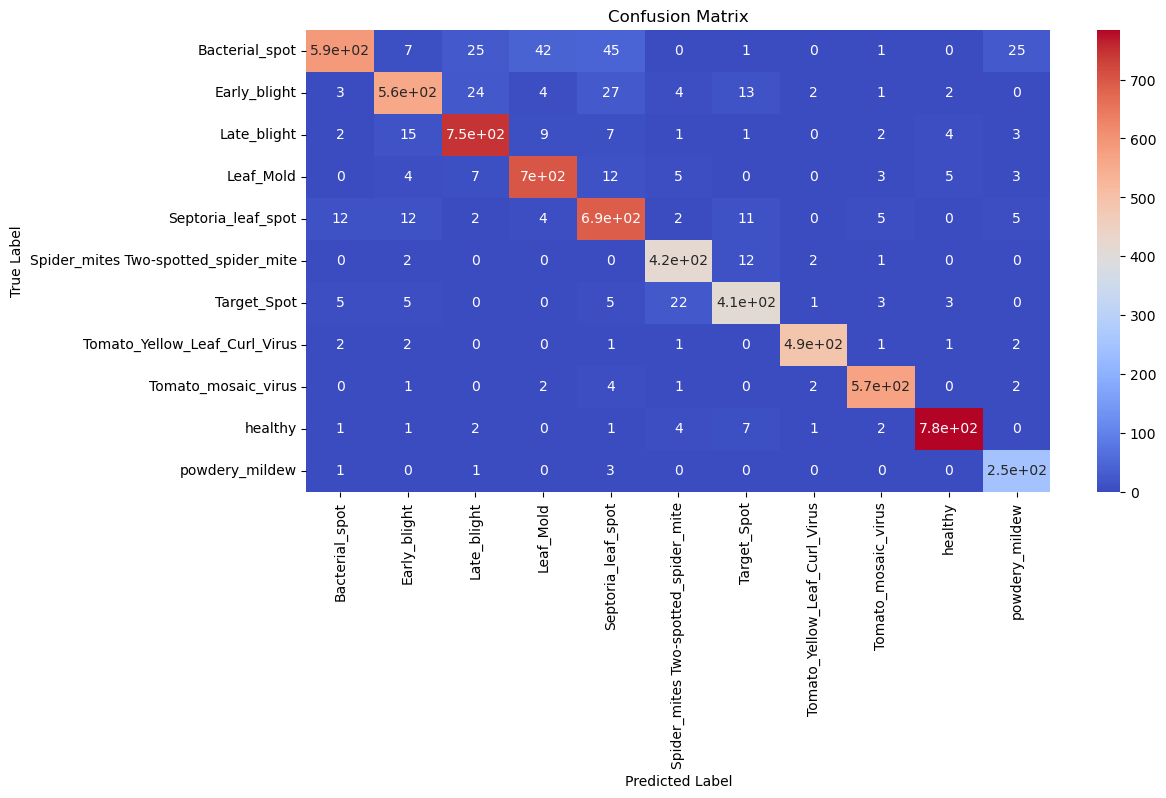

In [20]:
plt.figure(figsize=(12,6))
sn.heatmap(cm, annot=True, cmap='coolwarm',xticklabels=train_ds.class_names,yticklabels=train_ds.class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()